<a href="https://colab.research.google.com/github/mazenbuk/pytorch-tutorial/blob/master/CnN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [1/5], Step [100/600], Loss: 0.1501
Epoch [1/5], Step [200/600], Loss: 0.0634
Epoch [1/5], Step [300/600], Loss: 0.0278
Epoch [1/5], Step [400/600], Loss: 0.0681
Epoch [1/5], Step [500/600], Loss: 0.1638
Epoch [1/5], Step [600/600], Loss: 0.2244
Epoch [2/5], Step [100/600], Loss: 0.0566
Epoch [2/5], Step [200/600], Loss: 0.0633
Epoch [2/5], Step [300/600], Loss: 0.0158
Epoch [2/5], Step [400/600], Loss: 0.0471
Epoch [2/5], Step [500/600], Loss: 0.0764
Epoch [2/5], Step [600/600], Loss: 0.0170
Epoch [3/5], Step [100/600], Loss: 0.0314
Epoch [3/5], Step [200/600], Loss: 0.0363
Epoch [3/5], Step [300/600], Loss: 0.0110
Epoch [3/5], Step [400/600], Loss: 0.0465
Epoch [3/5], Step [500/600], Loss: 0.0317
Epoch [3/5], Step [600/600], Loss: 0.0063
Epoch [4/5], Step [100/600], Loss: 0.0868
Epoch [4/5], Step [200/600], Loss: 0.0259
Epoch [4/5], Step [300/600], Loss: 0.0443
Epoch [4/5], Step [400/600], Loss: 0.0268
Epoch [4/5], Step [500/600], Loss: 0.0131
Epoch [4/5], Step [600/600], Loss:

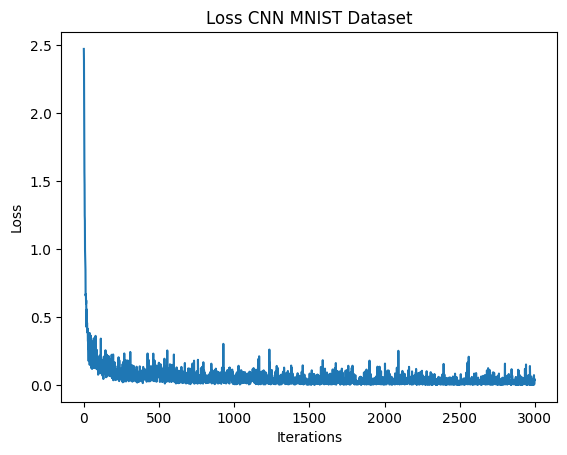

Test Accuracy of the model on the 10000 test images: 99.2 %


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           pin_memory=True,
                                           num_workers=8)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
loss_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move data to the appropriate device (GPU/CPU)
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        # Forward pass: Compute model output (predictions)
        outputs = model(images)

        # Calculate the loss between predicted output and actual labels
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Append the loss value to the list
        loss_list.append(loss.item())

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

plt.plot(loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss CNN MNIST Dataset')
plt.show()

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Files already downloaded and verified
Epoch [1/5], Step [100/500], Loss: 1.6468
Epoch [1/5], Step [200/500], Loss: 1.4288
Epoch [1/5], Step [300/500], Loss: 1.2183
Epoch [1/5], Step [400/500], Loss: 1.4387
Epoch [1/5], Step [500/500], Loss: 1.3929
Epoch [2/5], Step [100/500], Loss: 1.1904
Epoch [2/5], Step [200/500], Loss: 1.3029
Epoch [2/5], Step [300/500], Loss: 1.3212
Epoch [2/5], Step [400/500], Loss: 1.1096
Epoch [2/5], Step [500/500], Loss: 1.3055
Epoch [3/5], Step [100/500], Loss: 1.2141
Epoch [3/5], Step [200/500], Loss: 1.1637
Epoch [3/5], Step [300/500], Loss: 1.1590
Epoch [3/5], Step [400/500], Loss: 1.2204
Epoch [3/5], Step [500/500], Loss: 0.9956
Epoch [4/5], Step [100/500], Loss: 1.0998
Epoch [4/5], Step [200/500], Loss: 1.0027
Epoch [4/5], Step [300/500], Loss: 1.0080
Epoch [4/5], Step [400/500], Loss: 1.0743
Epoch [4/5], Step [500/500], Loss: 0.9847
Epoch [5/5], Step [100/500], Loss: 1.0119
Epoch [5/5], Step [200/500], Loss: 1.2315
Epoch [5/5], Step [300/500], Loss: 0.9

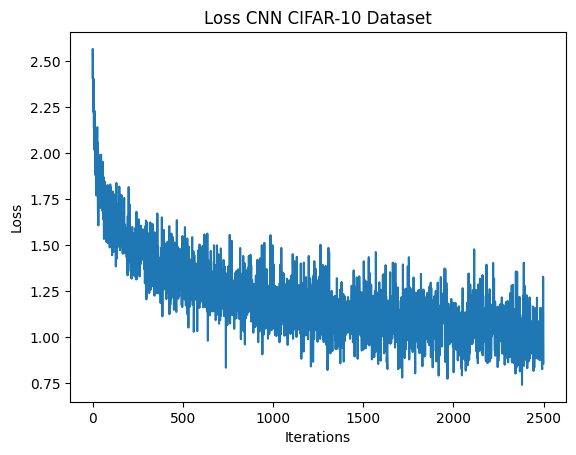

Test Accuracy of the model on the 10000 test images: 68.63 %


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# CIFAR-10 dataset with augmentations
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,
                                             transform=transform_train,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False,
                                            transform=transform_test)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           pin_memory=True,
                                           num_workers=8)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),  # input channels changed to 3
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(8*8*32, num_classes)  # adjusted for 32x32 input size

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
loss_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move data to the appropriate device (GPU/CPU)
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        # Forward pass: Compute model output (predictions)
        outputs = model(images)

        # Calculate the loss between predicted output and actual labels
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Append the loss value to the list
        loss_list.append(loss.item())

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

plt.plot(loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss CNN CIFAR-10 Dataset')
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model_cifar10.ckpt')

100%|██████████| 170498071/170498071 [00:03<00:00, 46920001.60it/s]


Extracting ../../data/cifar-10-python.tar.gz to ../../data/


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [1/20], Step [100/500], Loss: 1.9113
Epoch [1/20], Step [200/500], Loss: 1.7860
Epoch [1/20], Step [300/500], Loss: 1.6928
Epoch [1/20], Step [400/500], Loss: 1.5164
Epoch [1/20], Step [500/500], Loss: 1.4872
Epoch [2/20], Step [100/500], Loss: 1.3132
Epoch [2/20], Step [200/500], Loss: 1.4038
Epoch [2/20], Step [300/500], Loss: 1.4439
Epoch [2/20], Step [400/500], Loss: 1.3186
Epoch [2/20], Step [500/500], Loss: 1.3459
Epoch [3/20], Step [100/500], Loss: 1.0918
Epoch [3/20], Step [200/500], Loss: 1.0812
Epoch [3/20], Step [300/500], Loss: 1.1291
Epoch [3/20], Step [400/500], Loss: 1.2106
Epoch [3/20], Step [500/500], Loss: 1.1844
Epoch [4/20], Step [100/500], Loss: 1.0845
Epoch [4/20], Step [200/500], Loss: 1.0864
Epoch [4/20], Step [300/500], Loss: 1.1076
Epoch [4/20], Step [400/500], Loss: 1.3231
Epoch [4/20], Step [500/500], Loss: 1.0174
Epoch [5/20], Step [100/500], Loss: 1.0423
Epoch [5/20], Step [200/500], Loss: 1.0859
Epoch [5/20], Step [300/500], Loss: 1.1289
Epoch [5/20

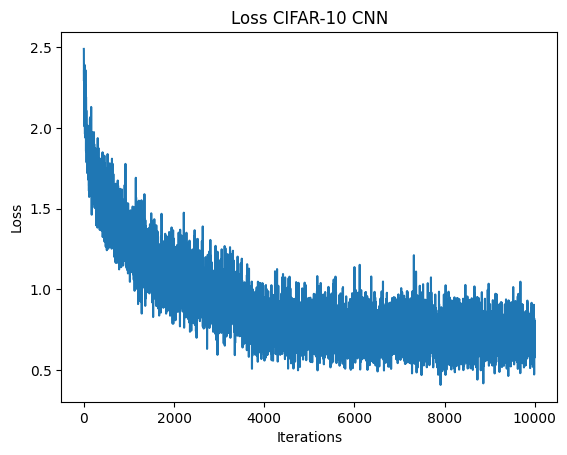

Test Accuracy: 79.19 %


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.optim import lr_scheduler

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 20  # Increase epochs
num_classes = 10
batch_size = 100
learning_rate = 0.01  # Higher initial learning rate

# CIFAR-10 dataset with additional augmentations
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

train_dataset = torchvision.datasets.CIFAR10(root='../../data/', train=True, transform=transform_train, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='../../data/', train=False, transform=transform_test)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=8)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Convolutional neural network with dropout layers and more channels
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Linear(4*4*128, 512)
        self.dropout = nn.Dropout(0.5)  # Dropout layer to reduce overfitting
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss, optimizer, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4)  # Changed to SGD with momentum
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)  # Learning rate scheduler

# Train the model
total_step = len(train_loader)
loss_list = []
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

    scheduler.step()  # Adjust learning rate

# Plot loss
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss CIFAR-10 CNN')
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f} %')

# Save the model checkpoint
torch.save(model.state_dict(), 'improved_model_cifar10.ckpt')